In [4]:
!pip install -q scikit-learn


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(sklearn.__version__)

1.5.1


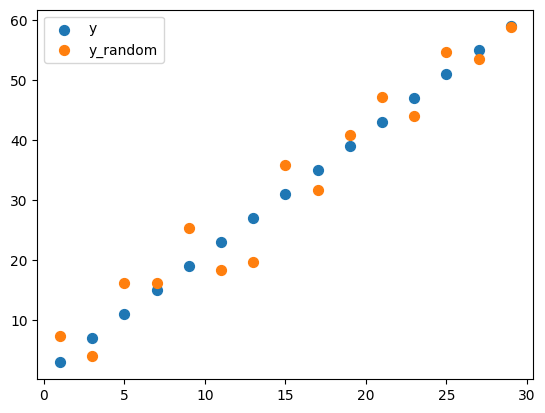

In [67]:
## 회귀분석
np.random.seed(910)
x = np.arange(1, 30, 2)
y = 2*x + 1 # coeff = 2, intercept = 1
y_random = y + np.random.normal(0, 5, len(y))

plt.scatter(x, y, s = 50, label = 'y')
plt.scatter(x, y_random, s = 50, label = 'y_random')
plt.legend()
plt.show()

In [68]:
## OLS 최소제곱추정량 
x_mean = np.mean(x)
y_mean = np.mean(y_random)

Sxy = sum((x - x_mean)*(y_random - y_mean))
Sxx =sum((x-x_mean)**2)

b1 = Sxy/Sxx
b0 = y_mean - b1 *x_mean

print('b1 = ', b1.round(3))
print('b0 = ', b0.round(3))

b1 =  1.938
b0 =  2.604


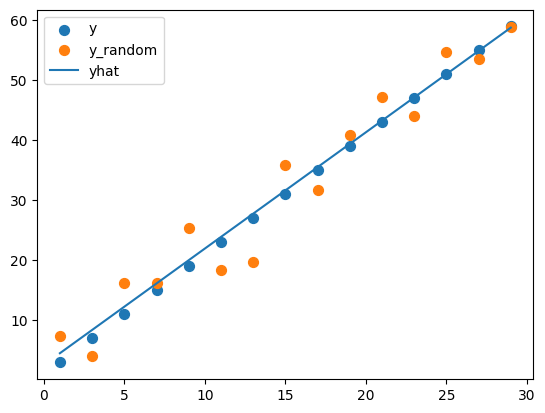

In [69]:
# print('y_random =', y_random.round(1))
# print('yhat =', (b1*x + b0).round(1))

yhat = b1*x + b0

# np.random.seed(910)
# x = np.arange(1, 30, 2)
# y = 2*x + 1 # coeff = 2, intercept = 1
# y_random = y + np.random.normal(0, 5, len(y))

plt.scatter(x, y, s = 50, label = 'y')
plt.scatter(x, y_random, s = 50, label = 'y_random')
plt.plot(x, yhat, label = 'yhat')
plt.legend()
plt.show()

In [48]:
##
from sklearn.linear_model import LinearRegression

In [70]:
x_2d = x.reshape(-1, 1) # extend dimension
print(x)
print(x_2d)
print(x_2d.shape)
print(x.shape) # < error

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]
 [23]
 [25]
 [27]
 [29]]
(15, 1)
(15,)


In [71]:
## class instance
lr = LinearRegression()

In [72]:
## fitting
lr.fit(x_2d, y_random)

LinearRegression()

In [73]:
## print
print('coeff = ', lr.coef_)
print('intercept = ', lr.intercept_)

coeff =  [1.93796006]
intercept =  2.604003991105561


In [74]:
## score
lr.score(x_2d, y_random) ## R**2

0.9459365046098771

In [82]:
import pandas as pd
cars_df = pd.read_csv('./dataset_1/dataset/cars.csv')

print(cars_df)

    speed  dist
0       4     2
1       4    10
2       7     4
3       7    22
4       8    16
5       9    10
6      10    18
7      10    26
8      10    34
9      11    17
10     11    28
11     12    14
12     12    20
13     12    24
14     12    28
15     13    26
16     13    34
17     13    34
18     13    46
19     14    26
20     14    36
21     14    60
22     14    80
23     15    20
24     15    26
25     15    54
26     16    32
27     16    40
28     17    32
29     17    40
30     17    50
31     18    42
32     18    56
33     18    76
34     18    84
35     19    36
36     19    46
37     19    68
38     20    32
39     20    48
40     20    52
41     20    56
42     20    64
43     22    66
44     23    54
45     24    70
46     24    92
47     24    93
48     24   120
49     25    85


In [87]:
## Summary statistic
cars_df.describe()
print('Summary statistic:')
print(cars_df.agg(['mean', 'std', 'median','min', 'max']))

Summary statistic:
            speed        dist
mean    15.400000   42.980000
std      5.287644   25.769377
median  15.000000   36.000000
min      4.000000    2.000000
max     25.000000  120.000000


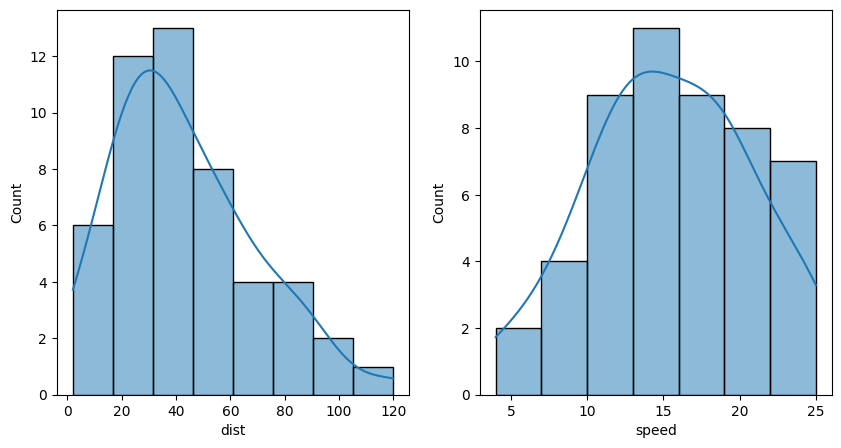

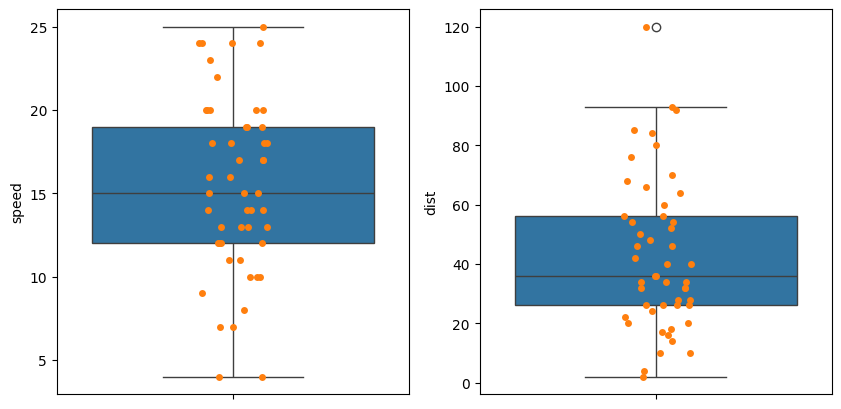

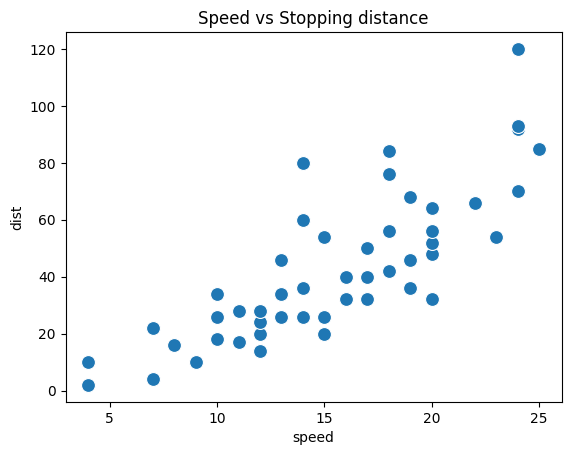

In [96]:
## Graph
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(cars_df, x = 'dist', ax = axs[0], kde = True)
sns.histplot(cars_df, x = 'speed', ax = axs[1], kde = True)
plt.show()

##
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(cars_df, y = 'speed', ax = axs[0])
sns.stripplot(cars_df, y = 'speed', ax = axs[0])

sns.boxplot(cars_df, y = 'dist', ax = axs[1])
sns.stripplot(cars_df, y = 'dist', ax = axs[1])
plt.show()

## Scatterplot
sns.scatterplot(cars_df, x = 'speed', y = 'dist', s = 100)
plt.title('Speed vs Stopping distance')
plt.show()

In [90]:
type(cars_df[['speed']])
type(cars_df['speed'])

pandas.core.series.Series

In [91]:
lr = LinearRegression()
lr.fit(cars_df[['speed']], cars_df['dist'])

LinearRegression()

In [92]:
##
print('coeff = ', lr.coef_[0].round(3))
print('intercept = ', lr.intercept_.round(3))

coeff =  3.932
intercept =  -17.579


In [94]:
##
print("R-squared =", round(lr.score(cars_df[['speed']], cars_df['dist']), 3))

R-squared = 0.651


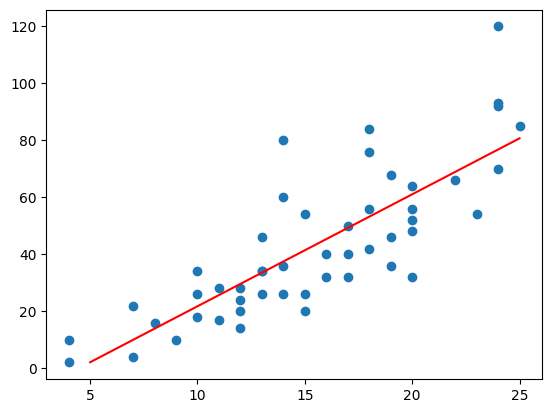

In [95]:
##
x_line = np.linspace(5, 25, 10)

plt.scatter(x = 'speed', y = 'dist', data = cars_df)
plt.plot(x_line, 3.932*x_line - 17.579, c = 'r')
plt.show()

In [144]:
mtcars = pd.read_excel('./dataset_1/dataset/mtcars.xlsx')
print(mtcars)

             Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.

In [146]:
mtcars.dtypes

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object

In [148]:
print('Summary statistic:')
print(mtcars.drop(["Unnamed: 0"], axis = 1).agg(['mean','std','median','min','max']))

Summary statistic:
              mpg       cyl        disp          hp      drat        wt  \
mean    20.090625  6.187500  230.721875  146.687500  3.596563  3.217250   
std      6.026948  1.785922  123.938694   68.562868  0.534679  0.978457   
median  19.200000  6.000000  196.300000  123.000000  3.695000  3.325000   
min     10.400000  4.000000   71.100000   52.000000  2.760000  1.513000   
max     33.900000  8.000000  472.000000  335.000000  4.930000  5.424000   

             qsec        vs        am      gear    carb  
mean    17.848750  0.437500  0.406250  3.687500  2.8125  
std      1.786943  0.504016  0.498991  0.737804  1.6152  
median  17.710000  0.000000  0.000000  4.000000  2.0000  
min     14.500000  0.000000  0.000000  3.000000  1.0000  
max     22.900000  1.000000  1.000000  5.000000  8.0000  


In [154]:
## Graph
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # Adjusted to 3x5 for 5 plots

cars = mtcars.loc[:, 'cyl':'wt']

sns.histplot(cars, x = 'cyl', ax = axs[0], kde =True)
sns.histplot(cars, x = 'disp', ax = axs[1], kde =True)
sns.histplot(cars, x = 'hp', ax = axs[2], kde =True)
sns.histplot(cars, x = 'drat', ax = axs[3], kde =True)
sns.histplot(cars, x = 'wt', ax = axs[4], kde =True)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 5, figsize = (20, 10))
axs = axs.flatten()

sns.boxplot(mtcars_df, y = 'cyl', ax = axs[0])
sns.stripplot(mtcars_df, y = 'cyl', ax = axs[0])

sns.boxplot(mtcars_df, y = 'disp', ax = axs[1])
sns.stripplot(mtcars_df, y = 'disp', ax = axs[1])

sns.boxplot(mtcars_df, y = 'hp', ax = axs[2])
sns.stripplot(mtcars_df, y = 'hp', ax = axs[2])

sns.boxplot(mtcars_df, y = 'drat', ax = axs[3])
sns.stripplot(mtcars_df, y = 'drat', ax = axs[3])

sns.boxplot(mtcars_df, y = 'wt', ax = axs[4])
sns.stripplot(mtcars_df, y = 'wt', ax = axs[4])
plt.tight_layout()
plt.show()


    cyl   disp   hp  drat     wt
0     6  160.0  110  3.90  2.620
1     6  160.0  110  3.90  2.875
2     4  108.0   93  3.85  2.320
3     6  258.0  110  3.08  3.215
4     8  360.0  175  3.15  3.440
5     6  225.0  105  2.76  3.460
6     8  360.0  245  3.21  3.570
7     4  146.7   62  3.69  3.190
8     4  140.8   95  3.92  3.150
9     6  167.6  123  3.92  3.440
10    6  167.6  123  3.92  3.440
11    8  275.8  180  3.07  4.070
12    8  275.8  180  3.07  3.730
13    8  275.8  180  3.07  3.780
14    8  472.0  205  2.93  5.250
15    8  460.0  215  3.00  5.424
16    8  440.0  230  3.23  5.345
17    4   78.7   66  4.08  2.200
18    4   75.7   52  4.93  1.615
19    4   71.1   65  4.22  1.835
20    4  120.1   97  3.70  2.465
21    8  318.0  150  2.76  3.520
22    8  304.0  150  3.15  3.435
23    8  350.0  245  3.73  3.840
24    8  400.0  175  3.08  3.845
25    4   79.0   66  4.08  1.935
26    4  120.3   91  4.43  2.140
27    4   95.1  113  3.77  1.513
28    8  351.0  264  4.22  3.170
29    6  1

In [ ]:
lr = LinearRegression()
lr.fit(cars_df[['speed']], cars_df['dist'])

In [ ]:
##
print('coeff = ', lr.coef_[0].round(3))
print('intercept = ', lr.intercept_.round(3))

In [ ]:
##
print("R-squared =", round(lr.score(cars_df[['speed']], cars_df['dist']), 3))

In [ ]:
##
x_line = np.linspace(5, 25, 10)

plt.scatter(x = 'speed', y = 'dist', data = cars_df)
plt.plot(x_line, 3.932*x_line - 17.579, c = 'r')
plt.show()